# MSDS 430 Module 6 Python Assignment Solutions  

<div class="alert alert-block alert-warning"><b>In this assignment you will read through the notebook and complete the exercises. Once you are satisfied with the results, submit your notebook and html file to Canvas. Your files should include all output, i.e. run each cell and save your file before submitting.</b></div>

<div class="alert alert-block alert-info"> 
    <b>Research project problem statement (continued from Module 5):</b>  
    
There are world happiness surveys conducted every year for many countries around the world. Happiness is measured on such subjective topics as social support, freedom, generosity, corruption, government trust, positive and negative affects.
<br>
    
This study will look at the happiness measures over multiple years to determine which of the measures are related to the overall happiness of a country.  And we will look at population of a country to see if this has any relationship to the happiness measures. Are larger countries based on population happier than smaller countries?<br><br>
    
<b>Objectives:</b>

- Read the clean file from Module 5 into a dataframe
- Use Seaborn pairplots to investigate each field closer and to inspect the relationships between fields
- Use a correlation matrix to look for relationships amoung variables
- Create new column in dataframe
- Learn how to handle a skewed variable
- Subset data by rows (certain years, certain countries)
- Subset data by columns (only include some columns in a new dataframe)
- Learn various ways to plot data using Seaborn and Plotly
- Create derived variables to add to the dataframe
- use dictionary and map to create new field
- seaborn pairplot (with hue)
- groupby with aggregators
- rankings and groupings

</div>

### References:

__[World Happiness Report](https://worldhappiness.report/ed/2022/#appendices-and-data)__

How the indices are calculated for each country: __[World Happiness FAQ](https://worldhappiness.report/faq/)__

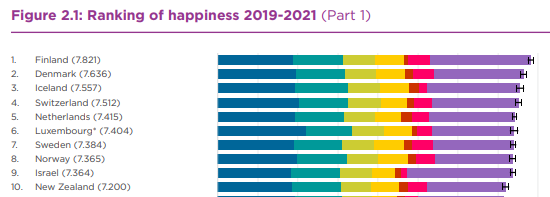

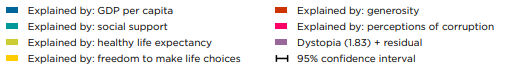

<div class="alert alert-block alert-danger"><b>Reminder: In all of the problems you will see <font color=black>#TODO</font> statements added as comments on the code cell provided. You will want to be sure to complete each of these as indicated to avoid losing points.</b></div>

In [1]:
# if you have not used plotly before, uncomment this cell and run once
# !pip install plotly

In [2]:
# Set up notebook to display multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline

### Change Dtype upon reading in file

If you go back and look at the Module 5 code, `Year` was saved as type `object`, but below it is read in by default as an `int64`. The `Year` column will not be used for mathematical operations in our analysis, but instead will be used as a label in plots and is better served as an `object`.  We could convert the variable after the pandas read or we can convert is as we read in the data.

In [3]:
# read in happiness scores
#merged = pd.read_csv('Happiness_clean.csv') # will read in Year as int64

merged = pd.read_csv('Happiness_clean.csv', dtype = {'Year': str})
merged.info()
merged.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                566 non-null    object 
 1   Year                   566 non-null    object 
 2   Life Ladder            566 non-null    float64
 3   Log GDP                566 non-null    float64
 4   Social support         566 non-null    float64
 5   Life Expectancy        566 non-null    float64
 6   Choice Freedom         566 non-null    float64
 7   Generosity             566 non-null    float64
 8   Corruption             566 non-null    float64
 9   Positive affect        566 non-null    float64
 10  Negative affect        566 non-null    float64
 11  Government confidence  566 non-null    float64
 12  Population             566 non-null    int64  
dtypes: float64(10), int64(1), object(2)
memory usage: 57.6+ KB


Country  Year  Life Ladder   Log GDP  Social support  Life Expectancy  \
0  Afghanistan  2015     3.982855  7.634466        0.528597        52.599998   
1  Afghanistan  2016     4.220169  7.629037        0.559072        52.924999   
2  Afghanistan  2017     2.661718  7.629684        0.490880        53.250000   
3  Afghanistan  2018     2.694303  7.617663        0.507516        53.575001   
4  Afghanistan  2019     2.375092  7.632903        0.419973        53.900002   

   Choice Freedom  Generosity  Corruption  Positive affect  Negative affect  \
0        0.388928    0.085082    0.880638         0.491410         0.339276   
1        0.522566    0.047488    0.793246         0.501409         0.348332   
2        0.427011   -0.116068    0.954393         0.435270         0.371326   
3        0.373536   -0.088125    0.927606         0.384561         0.404904   
4        0.393656   -0.103467    0.923849         0.324108         0.502474   

   Government confidence  Population  
0               0.260557    34413603  
1               0.324990    35383028  
2               0.261179    36296111  
3               0.364666    37171922  
4               0.341482    38041757

### Seaborn pairplots

__[Seaborn pairplots](https://seaborn.pydata.org/generated/seaborn.pairplot.html)__

The Seaborn pairplot will show a histogram of each variable and a scatterplot of each combination of variables. These views allow you to see the distribution of each individual field and also how each field interacts with the other fields.

In the example below, we are showing `Life Ladder`, `Log GDP` and `Corruption`.  There are a few things of note in the plots:
- There is a positive relationship between Log GDP and Life Ladder which means that as Log GDP increases, so does the Life Ladder score.
- There are two plots with negative leaning relationships: Corruption v. Life Ladder and Corruption v. Log GDP. A negative relationship in these cases indicates that as Corruption increases, Life Ladder (and LogGDP) decreases.
- Corruption is skewed left which means it has a negative skew.

['Life Ladder', 'Log GDP', 'Corruption']

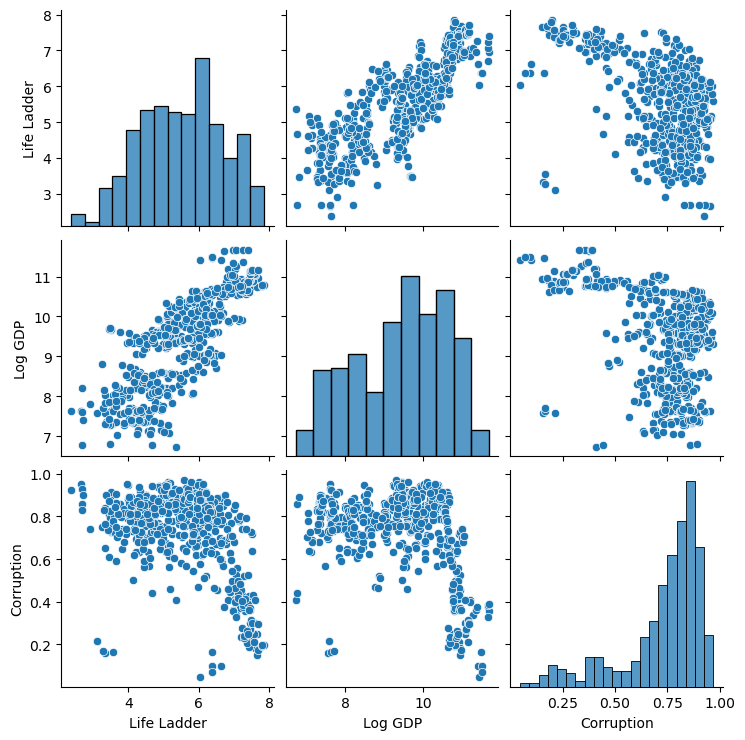

In [4]:
# pairplots on three fields
columns = ['Life Ladder','Log GDP','Corruption']
columns
sns.pairplot(merged[columns])

### Skewed data

- **Negative skew (aka left skewed)**: the left tail is longer and the mass of the distribution is on the right of plot which results in a right leaning curve.
- **Positive skew (aka right skewed)**: the right tail is longer and the mass of the distribution is on the left of the plot which results in a left leaning curve.
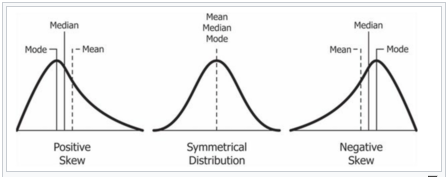
Source: __[What is Skewness?](https://www.analyticsvidhya.com/blog/2020/07/what-is-skewness-statistics/)__

In [5]:
import scipy
from scipy.stats import skew

print(skew(merged['Corruption'], axis = 0, bias = True))
merged['Corruption'].skew()

-1.45433598779675


-1.4582033326732935

### Handling skewed data

Data is considered to be skewed when the skew value is +3 or -3.  Even though `Corruption` only has a skew of -1.45, below is sample code of testing out two functions to normalize the data - Numpy's `log` and `square` function.

- `log` is typically used for postively skewed data
- `square` is typically used for negatively skewed data
- Note that there are other alternatives for normalizing data beyond log and square

In [6]:
# testing out log on negatively skewed data and it did not improve the skew
print('------- before log --------------')
merged['Corruption'].skew()
test = np.log(merged['Corruption'])
print('------- after log ---------------')
test.skew()
#test

------- before log --------------


-1.4582033326732935

------- after log ---------------


-2.6417261913936647

Using numpy's `log` function did not improve the skew value. In fact, the negative skew got further to the left from 0. As you can see with the `square` function, the skew value improved and got closer to 0.

In [7]:
# testing out square on negatively skewed data and it did improve skew
print('------- before square --------------')
merged['Corruption'].skew()
print('------- after square ---------------')
test = np.square(merged['Corruption'])
test.skew()
#test

------- before square --------------


-1.4582033326732935

------- after square ---------------


-0.8623948258485358

If you wanted to add the adjusted field to your data, you could use code like what is shown below.

In [8]:
'''merged['Corruption'].skew()
merged['Corruption_skew'] = np.square(merged['Corruption'])
merged['Corruption_skew'].skew()'''

"merged['Corruption'].skew()\nmerged['Corruption_skew'] = np.square(merged['Corruption'])\nmerged['Corruption_skew'].skew()"

<div class="alert alert-block alert-success"><b>Problem 1 (2 pts.)</b>: Create a Seaborn pairplot with the following fields:

- Life expectancy
- Log GDP
- Corruption
- Social support
- Choice Freedom
- Generosity
- Population
</div>

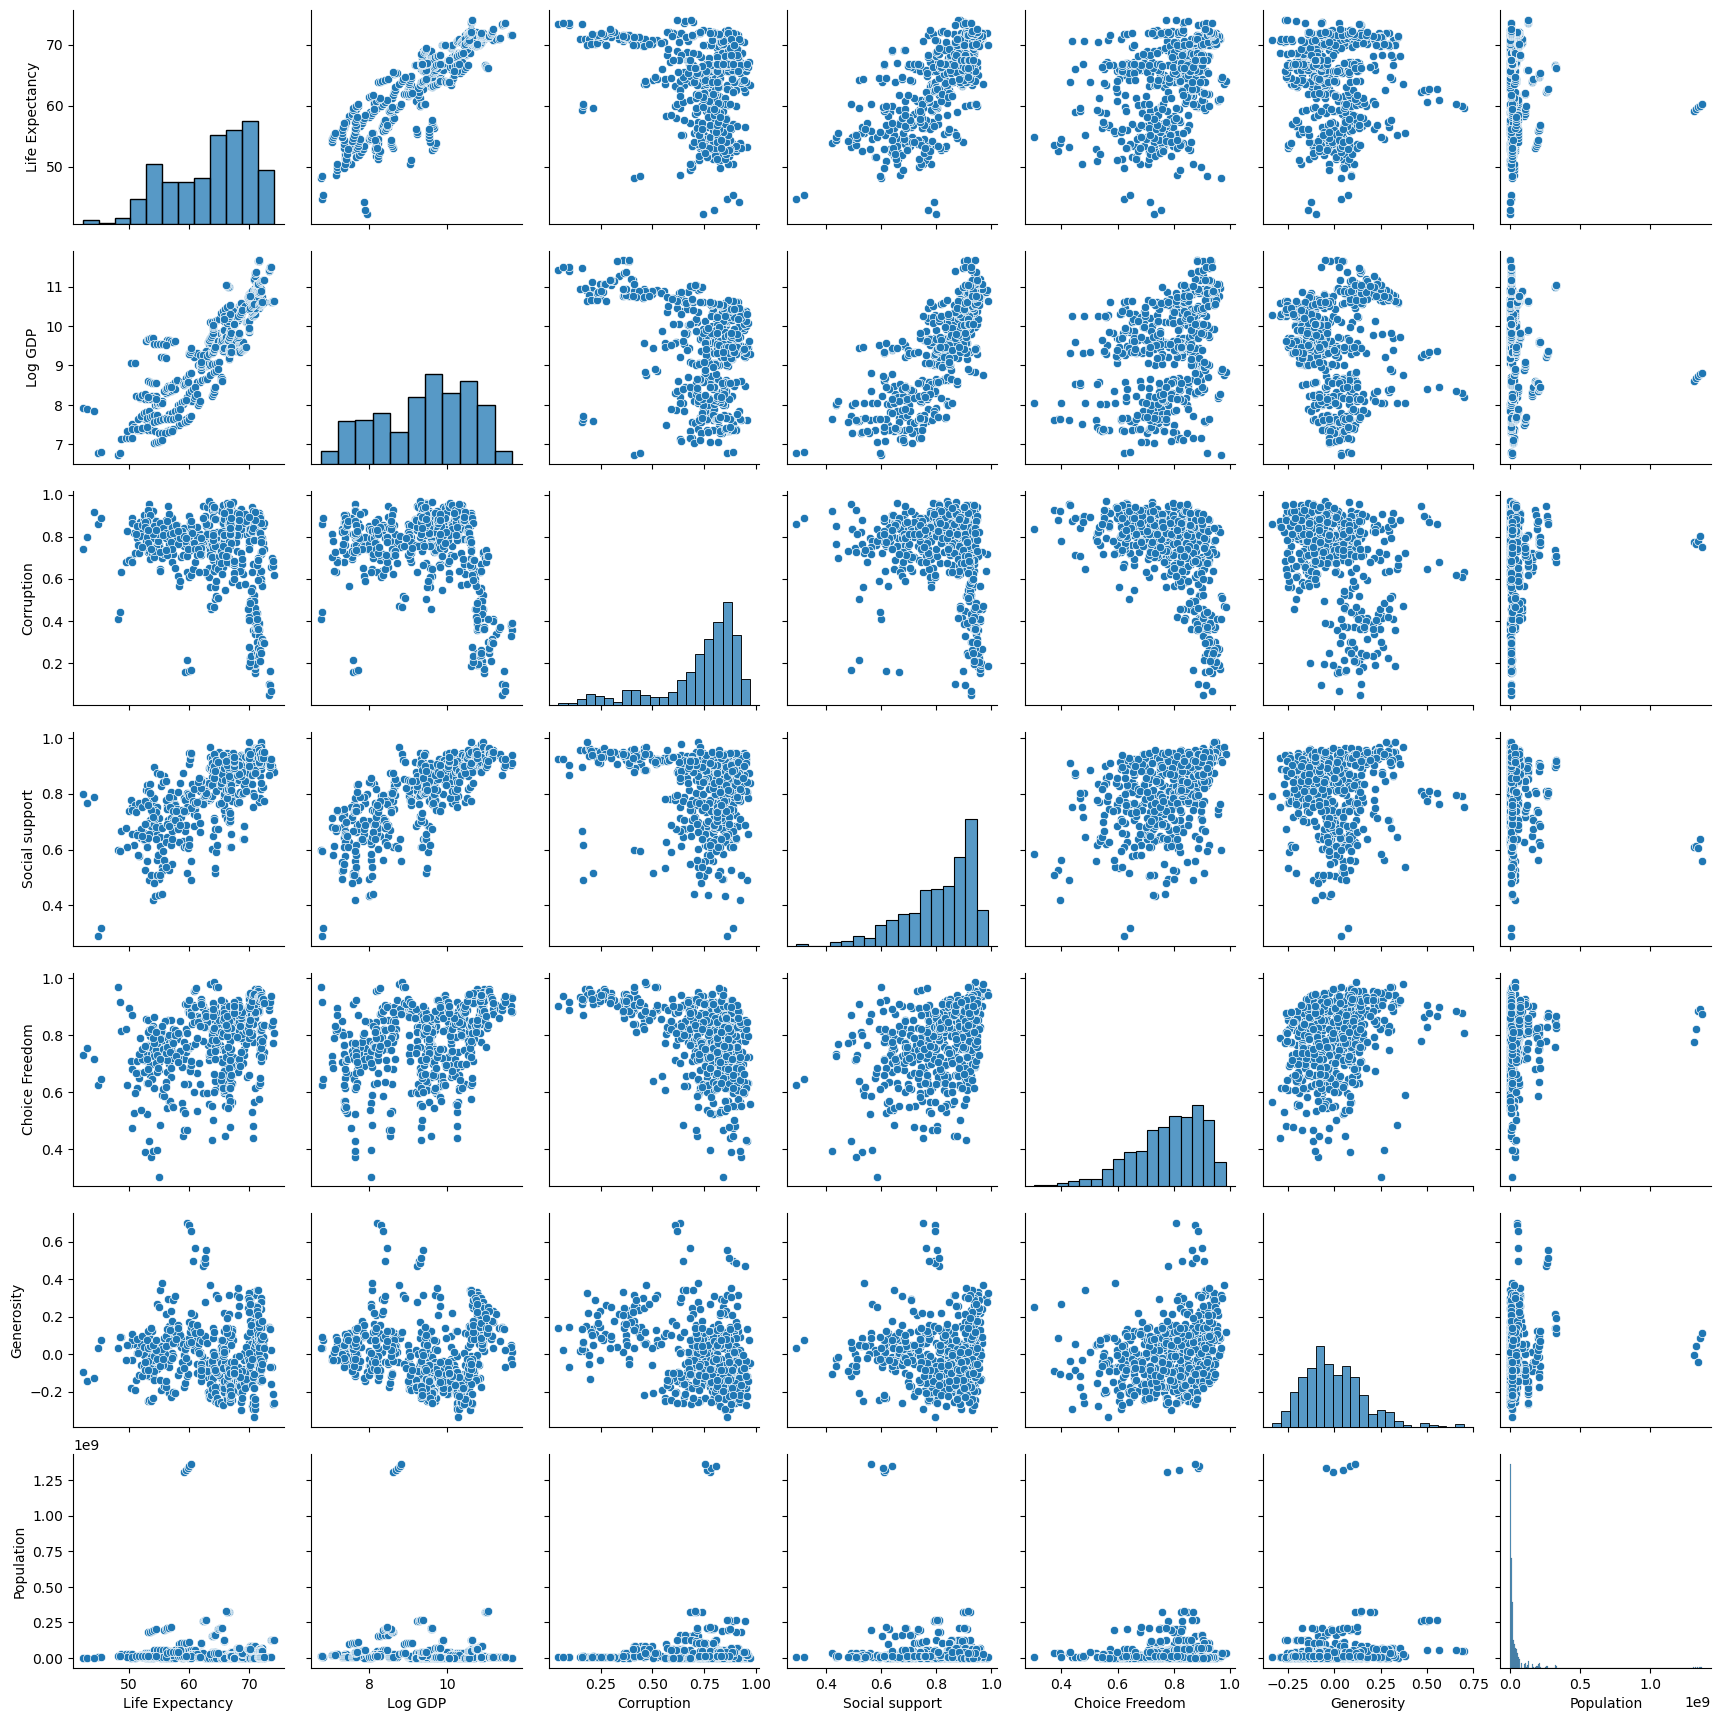

In [9]:
#TODO create pairplot
cols = ['Life Expectancy', 'Log GDP', 'Corruption', 'Social support', 'Choice Freedom', 'Generosity', 'Population'] 
sns.pairplot(merged[cols])

<div class="alert alert-block alert-success"><b>Problem 2 (2 pts.)</b>: Use a markdown cell to answer the following questions regarding the pairplots:

1. Explain the correlation between Log GDP and Life Expectancy based on the corresponding pairplot.
2. Explain how you would investigate what appear to be outliers in the Population pairplots.
</div>

1. This plot between 'Log GDP' and 'Life Expectancy' a strong positive relationship. As the Log GDP increases, the Life Expectancy also tends to increase. 

2. There are five outliers in the Population pairplots. These could be countries with the highest populations. 

    We could start by plotting a box plot for Population, we calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) for the 'Population' data. We define an outlier threshold as Q3 + 1.5 * IQR, following the common definition of an outlier in a box-and-whisker plot.

    Finally, we identify and print out the potential outliers, which are those countries with a population greater than our outlier threshold.

    If the outliers correspond to countries with the highest populations, this could suggest that these outliers are not errors or anomalies, but are simply extreme data points. In such cases, the decision of how to handle these outliers would depend on the specific context and purpose of the analysis.

<div class="alert alert-block alert-success"><b>Problem 3 (3 pts.)</b>: Complete the following tasks:

1. Display the skew value for `population`.
2. What is the skew value after a `log` transformation?
3. What is the skew value after a `square` transformation?
</div>

In [10]:
#TODO: Display the population skew
print('Population Skew: {:0.5f}'. format(merged['Population'].skew())) 

#TODO: Determine the skew value after a log transformation
log_pop = np.log(merged['Population'])
print('Population Skew after log transformation: {:0.5f}'.format(log_pop.skew())) 

#TODO: Display the skew value after a square transformation
sq_pop = np.square(merged['Population'])
print('Population Skew after square transformation: {:0.5f}'.format(sq_pop.skew()))  

Population Skew: 8.24050
Population Skew after log transformation: 0.21209
Population Skew after square transformation: 10.43757


### Correlation

We will create a correlation matrix and Seaborn heatmap to investigate how happiness measures and population are related, if at all.  More information on creating a heatmap using Seaborn can be found here:
__[Seaborn heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)__

What does the correlation matrix tell us? 
- There is a strong positive relationship (.803) between `Log GDP` and `Life Ladder` which suggests that those countries with a strong GDP have citizens with a better life.
- There is a moderate negative correlation (-.476) between `Corruption` and `Life Ladder` which suggests the less corruption, the better for a country.
- There is a negative correlation (-.374) between `Corruption` and `Log GDP` which suggests that the less corruption, the better the GDP.
- When you look back at the sample pairplots, they visually support these findings

Life Ladder   Log GDP  Corruption
Life Ladder     1.000000  0.803193   -0.476317
Log GDP         0.803193  1.000000   -0.374004
Corruption     -0.476317 -0.374004    1.000000

<Axes: >

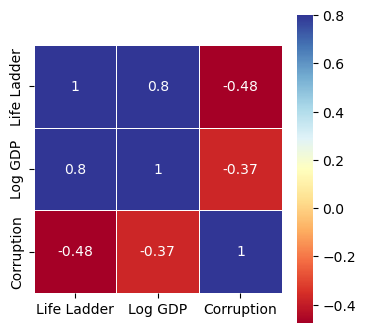

In [11]:
# set up files for correlations
columns = ['Life Ladder','Log GDP', 'Corruption']
df_corr = merged[columns]

# creates a correlation matrix
corrmat = df_corr.corr()
corrmat

# heatmap of correlation matrix
f, ax = plt.subplots(figsize = (4, 4))
sns.heatmap(corrmat, vmax = .8, square = True, annot = True, cmap = 'RdYlBu', linewidths = .5 )

<div class="alert alert-block alert-success"><b>Problem 4 (3 pts.)</b>: Create a correlation matrix using the Seaborn heatmap and include all numerics in the dataframe starting at `Life Ladder` and ending at `Population`. The heatmap should include eleven variables and use a different color combination than the one above. 
    
__[Colormap Reference](https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html)__</div>

(566, 11)

Life Ladder   Log GDP  Social support  Life Expectancy  \
Life Ladder               1.000000  0.803193        0.764924         0.783197   
Log GDP                   0.803193  1.000000        0.790056         0.878006   
Social support            0.764924  0.790056        1.000000         0.709735   
Life Expectancy           0.783197  0.878006        0.709735         1.000000   
Choice Freedom            0.547298  0.375866        0.421265         0.378678   
Generosity                0.102491 -0.067223        0.002527        -0.020898   
Corruption               -0.476317 -0.374004       -0.278219        -0.340850   
Positive affect           0.476297  0.243472        0.390959         0.222021   
Negative affect          -0.468102 -0.538274       -0.611946        -0.441006   
Government confidence    -0.135352 -0.262434       -0.190980        -0.275906   
Population               -0.104939 -0.059433       -0.148190        -0.068245   

                       Choice Freedom  Generosity  Corruption  \
Life Ladder                  0.547298    0.102491   -0.476317   
Log GDP                      0.375866   -0.067223   -0.374004   
Social support               0.421265    0.002527   -0.278219   
Life Expectancy              0.378678   -0.020898   -0.340850   
Choice Freedom               1.000000    0.275339   -0.507638   
Generosity                   0.275339    1.000000   -0.321057   
Corruption                  -0.507638   -0.321057    1.000000   
Positive affect              0.596388    0.246817   -0.337151   
Negative affect             -0.361122   -0.052446    0.397675   
Government confidence        0.431481    0.410747   -0.464388   
Population                   0.075748    0.109213    0.047736   

                       Positive affect  Negative affect  \
Life Ladder                   0.476297        -0.468102   
Log GDP                       0.243472        -0.538274   
Social support                0.390959        -0.611946   
Life Expectancy               0.222021        -0.441006   
Choice Freedom                0.596388        -0.361122   
Generosity                    0.246817        -0.052446   
Corruption                   -0.337151         0.397675   
Positive affect               1.000000        -0.307170   
Negative affect              -0.307170         1.000000   
Government confidence         0.173050        -0.057732   
Population                   -0.017792         0.080105   

                       Government confidence  Population  
Life Ladder                        -0.135352   -0.104939  
Log GDP                            -0.262434   -0.059433  
Social support                     -0.190980   -0.148190  
Life Expectancy                    -0.275906   -0.068245  
Choice Freedom                      0.431481    0.075748  
Generosity                          0.410747    0.109213  
Corruption                         -0.464388    0.047736  
Positive affect                     0.173050   -0.017792  
Negative affect                    -0.057732    0.080105  
Government confidence               1.000000    0.135683  
Population                          0.135683    1.000000

<Axes: >

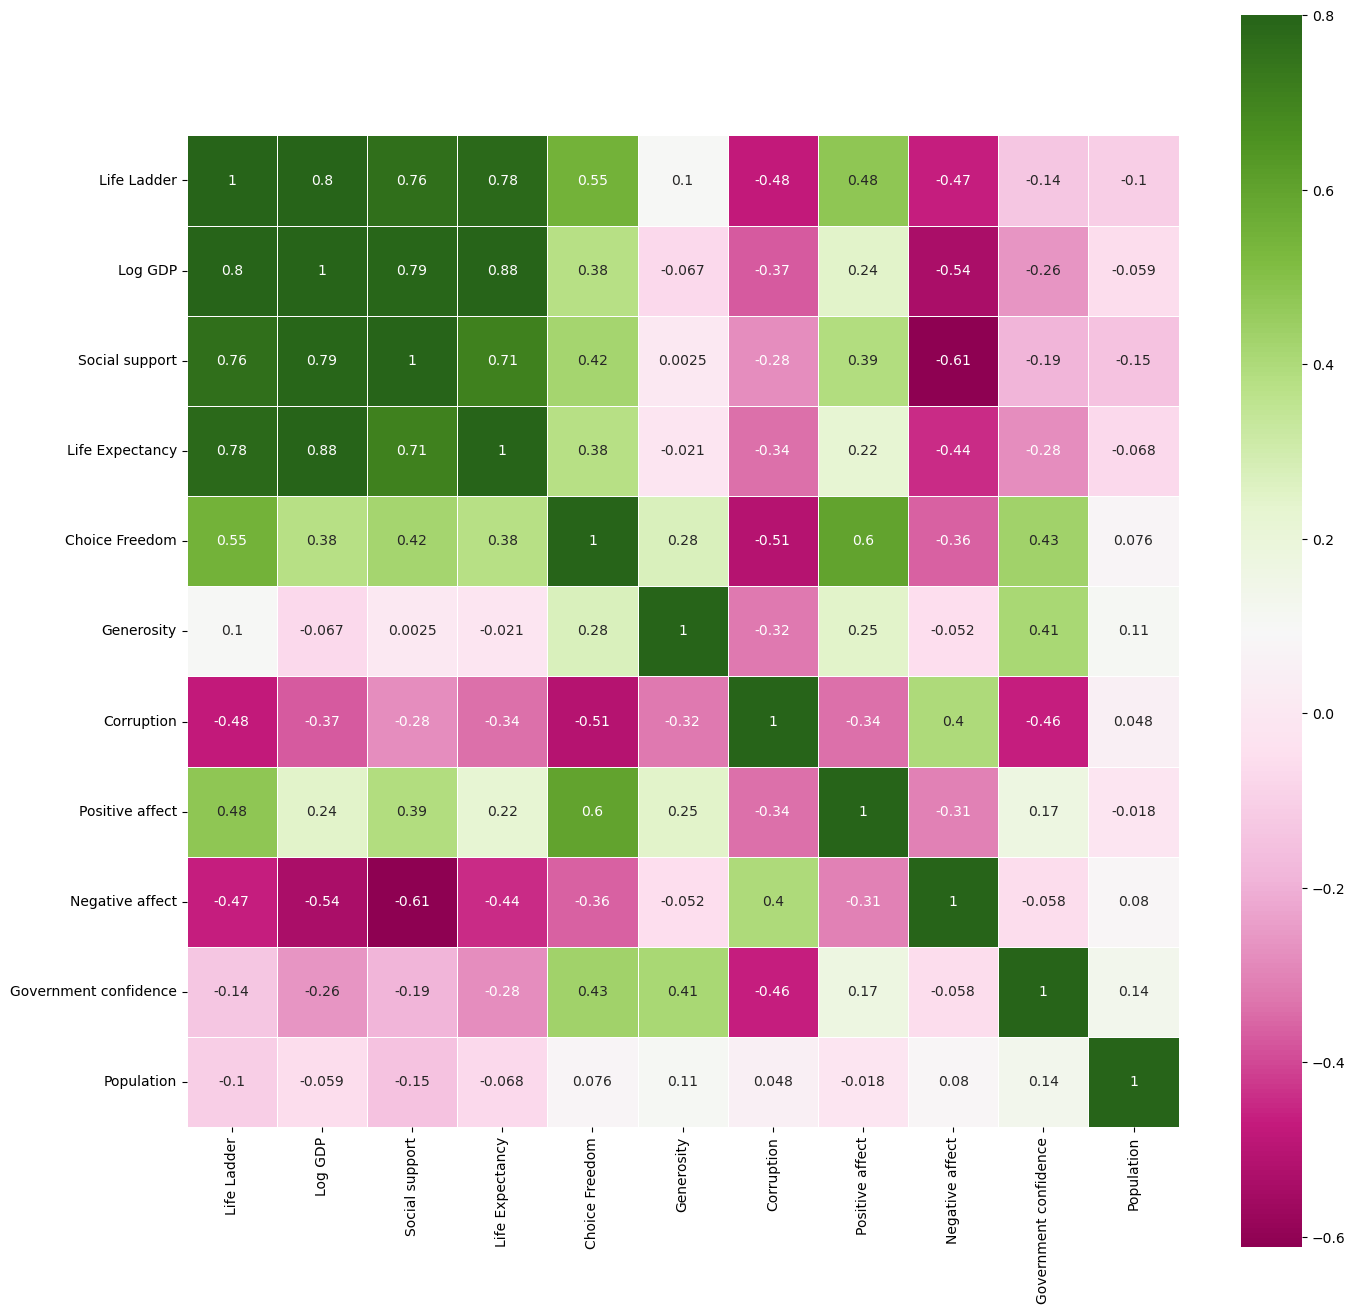

In [12]:
# TODO: Create a heat map using all eleven numeric variables and use a new color combination.

# set-up files for correlations
num_data = merged.select_dtypes(include=[np.number]) 
num_data.shape
num_cols = num_data.columns

# create the correlation matrix
corr_mat = num_data.corr()
corr_mat

# create the heatmap for correlation matrix
f, ax = plt.subplots(figsize = (16, 16))
sns.heatmap(corr_mat, vmax=0.8, square=True, annot=True, cmap='PiYG', linewidths=0.5)

<div class="alert alert-block alert-success"><b>Problem 5 (2 pts.)</b>:
    
Use a markdown cell to answer the following questions regarding the heatmap:
1. One of the research questions was to understand the relationship between population and happiness measures. What does the correlation matrix tell you about this relationship?
2. Another question we wanted to answer was the relationship between life expectancy and happiness measures. What does the correlation matrix tell you about this relationship?
</div>

1. The correlation data indicates a slight negative association between population size and variables like Life Ladder, Log GDP, Social Support, Life Expectancy, and Positive Affect. This hints at a possible decline in these parameters as population increases, although these relationships are very weak and thus not substantial. Likewise, although there are positive correlations between Population and Government Confidence, Negative Affect, and Generosity, these relationships are also rather weak, underlining their marginal influence.

2. Life Expectancy shows substantial positive associations with factors such as Life Ladder, Log GDP, Social Support, Choice Freedom, and Positive Affect, indicating that an increase in life expectancy often aligns with an increase in these measures. On the other hand, Life Expectancy exhibits weaker negative correlations with Generosity, Corruption, Government Confidence, and Population, implying that these parameters might slightly decrease as life expectancy increases, with the relationship with Corruption being somewhat more pronounced.

### Subset data to look at one country

One way to investigate data is to pull a smaller subset of data so that it is easy to inspect each row and column.

In [13]:
fin = merged[merged['Country'] == 'Finland']
fin

Country  Year  Life Ladder    Log GDP  Social support  Life Expectancy  \
169  Finland  2015     7.447926  10.716029        0.947801        70.699997   
170  Finland  2016     7.659843  10.740882        0.953940        70.775002   
171  Finland  2017     7.788252  10.769960        0.963826        70.849998   
172  Finland  2018     7.858107  10.779988        0.962155        70.925003   
173  Finland  2019     7.780348  10.792235        0.937416        71.000000   

     Choice Freedom  Generosity  Corruption  Positive affect  Negative affect  \
169        0.929862    0.108773    0.223370         0.736426         0.191058   
170        0.948372   -0.029360    0.249660         0.768806         0.181998   
171        0.962199   -0.004811    0.192413         0.755858         0.176066   
172        0.937807   -0.129722    0.198605         0.748826         0.181781   
173        0.947617   -0.054119    0.195338         0.732282         0.180733   

     Government confidence  Population  
169               0.557600     5479531  
170               0.485727     5495303  
171               0.597539     5508214  
172               0.555102     5515525  
173               0.639188     5521606

### Subset data to look at one year

The heatmap allows us to see which variables have the highest values within the top 20 countries based on `Life Ladder` scores for 2015.


In [14]:
# 2015 only data
year2015 = merged[merged['Year'] == '2015']

# top 20 of 2015 based on life ladder
t2015 = year2015.sort_values(by = ['Life Ladder'], ascending = False)[:20]
t2015.style.background_gradient(cmap = 'Greens')

### Results of heatmap of top 20 for 2015 based on Life Ladder

- For the top 20, the most consistent four categories with the highest scores are Choice Freedom, Life Expectancy, Social Support and Generosity.  Corruption has lower values.
- Interesting to note that the top 20 do not include many of the large populated countries.


<div class="alert alert-block alert-success"><b>Problem 6 (2 pts.)</b>:
    
Create a new gradient heatmap (not a correlation matrix) for one country:
1. Create a new data object that only contains data for any country of your choosing.
2. Show a heatmap of all years for the country sorted on the Year value.  Consider using a different color for your heatmap.

</div>

In [15]:
#TODO: Isolate one country - your choice of country
nor = merged[merged['Country'] == 'Norway']
#TODO: Create a heatmap of your country with all measures
nor_sort = nor.sort_values(by = ['Year'], ascending = False)
nor_sort.style.background_gradient(cmap = 'Blues')

### Plotting using Seaborn and Plotly

In the example below, we are selecting a subset of columns from 2015 with four columns - `Country`, `Life Ladder`, `Log GDP` and `Social support`.  Note that we created two files, one for the bottom of 2015 based on `Life Ladder` and one for all of 2015. We will use these files for plotting examples.


In [16]:
# isolate four fields for the bottom 20 of 2015
b2015 = year2015.sort_values(by = ['Life Ladder'], ascending = True)[:20]

subset2015b = b2015[['Country', 'Life Ladder', 'Log GDP', 'Social support']]
# isolate four fields for all of 2015
subset2015all = year2015[['Country', 'Life Ladder', 'Log GDP', 'Social support']]

### Seaborn styles

You can change the style of your plots, but once you set the style, it is set for the whole notebook whenever you use Seaborn.

In [17]:
# seaborn styles
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


### Stacked barchart

This stacked barchart below is using the data from the bottom 20 countries for 2015.

__[Stacked Bar Plot](https://www.geeksforgeeks.org/create-a-stacked-bar-plot-in-matplotlib/)__

C:\Users\rites\AppData\Local\Temp\ipykernel_19552\3829428293.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


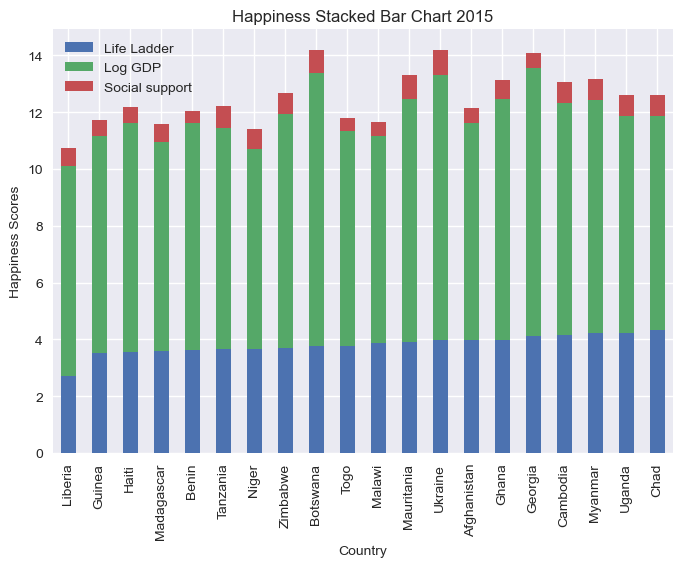

In [18]:
# example using the seaborn style
plt.style.use('seaborn')
subset2015b.plot(x = 'Country', kind = 'bar', stacked = True, title = 'Happiness Stacked Bar Chart 2015',
                ylabel = 'Happiness Scores')
ax.legend
plt.show();

### Horizontal barchart with one Happiness characteristic

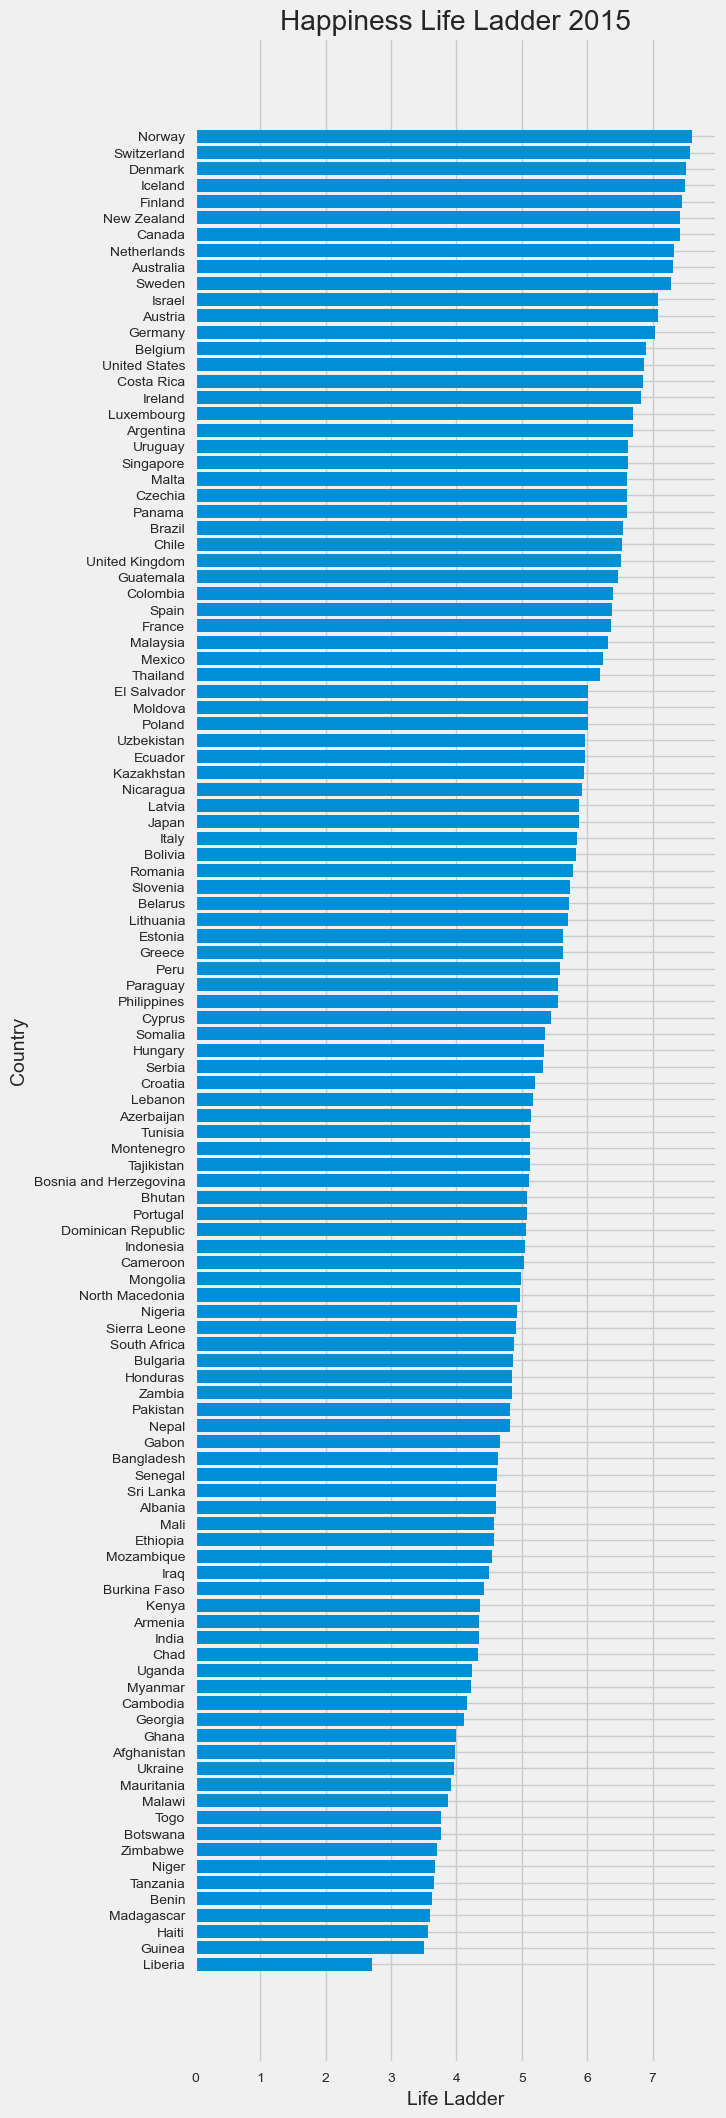

In [19]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (6, 25))

subset2015all = subset2015all.sort_values(by = 'Life Ladder')

ax.barh(subset2015all['Country'], subset2015all['Life Ladder'], align = 'center')

ax.set(xlabel = 'Life Ladder', ylabel = 'Country',
       title = 'Happiness Life Ladder 2015');

### Example of bad graph

- There is no header
- There is no x or y axis label
- The country names on the x axis are all running together; this can be fixed by rotating the axis label

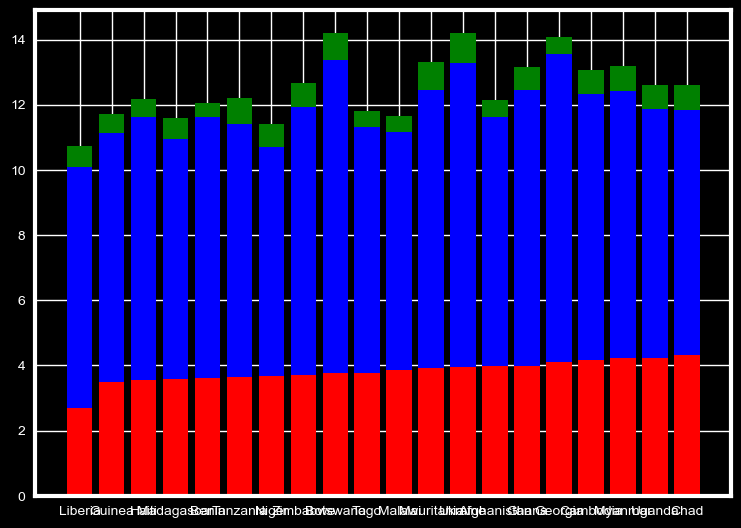

In [20]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize = (8, 6))

x = subset2015b['Country']
y1 = subset2015b['Life Ladder']
y2 = subset2015b['Log GDP']
y3 = subset2015b['Social support']

plt.bar(x, y1, color = 'r');
plt.bar(x, y2, bottom = y1, color = 'b');
plt.bar(x, y3, bottom = y1+y2, color = 'g');


### Horizontal stacked barchart

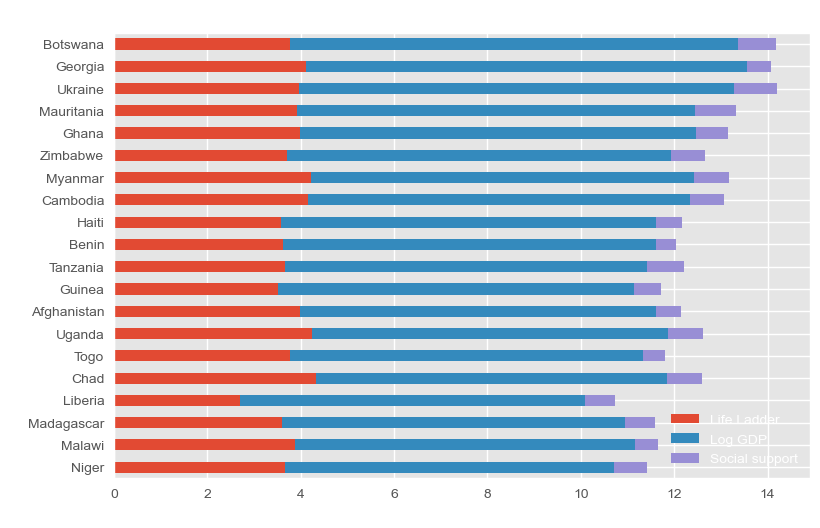

In [21]:
plt.style.use('ggplot')
subset2015sorted = subset2015b.sort_values(by = 'Log GDP', ascending = True)
subset2015sorted.plot(x = 'Country', kind = 'barh', stacked = True, title = '2015 Happiness')
plt.xlabel('Category scores');
plt.show();

### Plotting with three variables

The plotly bubble chart below shows `Life Ladder`, `Life Expectancy` and `Population`. This uses the y-axis, x-axis and the size of the circle represents the size of the population. The purpose of this plot is to visually inspect the countries selected in regards to three variables selected.

Hover over each circle to see the three values plotted for that country.

__[Bubble Charts](https://plotly.com/python/bubble-charts/)__

In [22]:
# set theme back to default
sns.set_theme()

# bubble chart
fig = px.scatter(b2015, x = "Life Expectancy", y = "Life Ladder", color = 'Country', 
                 size = 'Population', size_max = 60, text = 'Country',
        title='Happiness and Population in 2015', 
                 color_discrete_sequence = px.colors.qualitative.Bold)
fig.update_layout(xaxis_title = 'Life Expectancy',
                 yaxis_title = 'Life Ladder');
fig.show();

<div class="alert alert-block alert-success"><b>Problem 7 (6 pts.)</b>: 
    
- Use only 2019 data.
- From the 2019 data, select any 10 countries to create a plotly bubble chart.  
- Also select any three fields for the chart.  Keep in mind that the size of the bubble helps to provide insight to the chart; consider this when choosing which variable to represent the bubble.
- Make sure your plot has x axis labels, y axis labels and a title.
</div>

In [23]:
# TODO: Create a subset of 10 countries using only 2019 data
year2019 = merged[merged['Year'] == '2019']
b2019 = year2019.sort_values(by = ['Log GDP'], ascending = False)[:10] 
subset2019 = b2019[['Country', 'Log GDP', 'Life Expectancy', 'Corruption']]
subset2019

Country    Log GDP  Life Expectancy  Corruption
304     Luxembourg  11.665803        71.599998    0.389598
471      Singapore  11.496914        73.599998    0.069620
249        Ireland  11.369633        71.099998    0.372804
502    Switzerland  11.169651        72.500000    0.293701
408         Norway  11.073689        71.400002    0.270572
546  United States  11.045013        66.099998    0.706716
141        Denmark  10.953639        71.000000    0.174151
378    Netherlands  10.947011        71.400002    0.360068
29         Austria  10.930130        70.900002    0.457089
193        Germany  10.895435        70.900002    0.462255

<div class="alert alert-block alert-success"><b>Problem 7 continued:</b> Create a bubble chart.</div>

In [24]:
# TODO: Create bubble chart
fig = px.scatter(subset2019, x = 'Life Expectancy', y = "Log GDP", color = 'Country', 
                 size = 'Corruption', size_max = 60, text = 'Country',
        title='Life Expectancy, Log GDP, and Corruption in 2019', 
                 color_discrete_sequence = px.colors.qualitative.Bold)
fig.update_layout(xaxis_title = 'Life Expectancy',
                  yaxis_title = 'Log GDP');
fig.show();


<div class="alert alert-block alert-success"><b>Problem 8 (3 pts.)</b>:
    
- Explain in a Markdown cell why you chose the 10 countries that you did. 
- Explain why you chose the three variables you did. 
- How would you interpret the chart?
</div>

1. The analysis focuses on the ten countries with the highest Log GDP to explore the relationship between Corruption and Life Expectancy within economically prosperous nations - top ten countires with the highest Log GDPs. 

2. The three variables, Log GDP (an economic indicator), Corruption (a governance indicator), and Life Expectancy (a health indicator), were chosen to examine how wealth and governance might impact public health. 

3. Among the selected countries, Singapore stands out with the lowest level of corruption and the highest life expectancy, whereas the United States exhibits the highest corruption level and the lowest life expectancy. The remaining eight countries, all European, display similar figures for Log GDP, Corruption, and life expectancy, indicating a relatively consistent pattern within the European context.

### Adding the Continent as a new field

Very often when you start working with data, some insight may appear that was not part of your original questions. In this case as we look at the top 20 countries based on `Life Ladder`, there are quite a few from Europe. Could the level of happiness vary by Continent?

To add a new `Continent`field to our data, we will use a new library, `pycountry_convert`, along with functions, `map` and a data dictionary.



In [25]:
# pip install pycountry-convert

In [26]:
from pycountry_convert import country_name_to_country_alpha2, country_alpha2_to_continent_code

### Three step process to get the Continent per Country

1. First we will use the Country to get a two character country code
2. Next we will use the two character country code to get the continent code
3. Then we create continent names using `map` and a data dictionary for ease of readability when using in visuals

Note that without the availability of the `pycountry_convert` library, we would have had to create our own translation of `Country` to `Continent` - and that would have been a lot of coding!

### Step 1: two character country code

In [27]:
# function to use the country to get a two character country code
def country_code(country):
    try:
        #print(country)
        c_code = country_name_to_country_alpha2(country)
    except:
        print('Not in lookup: ', country)
    return(c_code)

In [28]:
# call function and save country code into our dataframe
merged['Country_code'] = merged['Country'].map(country_code)
merged.sample(5)

Country  Year  Life Ladder    Log GDP  Social support  Life Expectancy  \
209    Guinea  2015     3.504694   7.643931        0.578860        51.500000   
414    Panama  2015     6.605550  10.255235        0.882615        68.300003   
324     Malta  2016     6.590842  10.609963        0.930369        71.349998   
450    Rwanda  2018     3.561047   7.644321        0.616173        59.875000   
513  Thailand  2017     5.938895   9.765544        0.877269        68.150002   

     Choice Freedom  Generosity  Corruption  Positive affect  Negative affect  \
209        0.665953    0.006996    0.762152         0.658104         0.267741   
414        0.846669   -0.009005    0.809943         0.777305         0.263826   
324        0.916024    0.342254    0.696495         0.644832         0.355444   
450        0.924232    0.057375    0.163810         0.765132         0.308199   
513        0.922897    0.210881    0.883817         0.775898         0.231598   

     Government confidence  Population Country_code  
209               0.610288    11432096           GN  
414               0.375585     3968490           PA  
324               0.618818      455356           MT  
450               0.988120    12301969           RW  
513               0.605079    69209817           TH

### Step 2: two character continent code

In [29]:
# function to use two character country code to get the continent code
def continent(c_code):
    try:
        cont = country_alpha2_to_continent_code(c_code)
    except:
        print('Not in lookup: ', c_code)
        cont = 'None'
    return(cont)

In [30]:
# call function and store into our dataframe
merged['Continent_code'] = merged['Country_code'].map(continent)
merged.sample(5)

Country  Year  Life Ladder    Log GDP  Social support  \
105                      Chad  2019     4.250799   7.364944        0.640452   
486                     Spain  2017     6.230173  10.584788        0.903158   
100  Central African Republic  2017     3.475862   6.816520        0.319589   
441                  Portugal  2018     5.919823  10.435313        0.887113   
189                   Germany  2015     7.037138  10.842699        0.925923   

     Life Expectancy  Choice Freedom  Generosity  Corruption  Positive affect  \
105        52.000000        0.537246    0.055652    0.832283         0.556211   
486        71.849998        0.755561   -0.034348    0.791269         0.601179   
100        45.299999        0.645252    0.073952    0.889566         0.602205   
441        70.875000        0.877404   -0.263654    0.879728         0.645732   
189        70.099998        0.889429    0.175081    0.412168         0.722385   

     Negative affect  Government confidence  Population Country_code  \
105         0.460061               0.571986    15946882           TD   
486         0.302388               0.269586    46593236           ES   
100         0.599335               0.650285     4596023           CF   
441         0.317995               0.520631    10283822           PT   
189         0.202705               0.628004    81686611           DE   

    Continent_code  
105             AF  
486             EU  
100             AF  
441             EU  
189             EU

In [31]:
# look at counts per continent
merged['Continent_code'].value_counts()

EU    182
AF    156
AS    117
NA     57
SA     44
OC     10
Name: Continent_code, dtype: int64

### Step 3: translate two character continent code to continent name

In [32]:
# translate continent code to continent label
contMap = {'EU':'Europe',
            'AF':'Africa',
            'AS':'Asia',
            'NA':'North America',
            'SA':'South America',
            'OC':'Oceana'}
merged['Continent'] = merged['Continent_code'].map(contMap)

In [33]:
# double check mapping of names
merged['Continent'].value_counts()

Europe           182
Africa           156
Asia             117
North America     57
South America     44
Oceana            10
Name: Continent, dtype: int64

### Pandas groupby to get mean

Below shows the mean values for each Happiness measure based on the continent.

In [34]:
merged.groupby('Continent').mean(numeric_only = True)

Life Ladder    Log GDP  Social support  Life Expectancy  \
Continent                                                                
Africa            4.341149   8.104643        0.696419        55.270696   
Asia              5.198648   9.329025        0.785495        64.200641   
Europe            6.280222  10.428544        0.895217        69.060303   
North America     6.181226   9.572108        0.843899        65.164035   
Oceana            7.277362  10.718973        0.949862        70.400000   
South America     6.092384   9.627538        0.869582        67.113636   

               Choice Freedom  Generosity  Corruption  Positive affect  \
Continent                                                                
Africa               0.730466   -0.011639    0.781105         0.654864   
Asia                 0.784404    0.063934    0.735630         0.612498   
Europe               0.790161   -0.028179    0.674871         0.644895   
North America        0.826778   -0.004400    0.742341         0.767733   
Oceana               0.926028    0.229548    0.312776         0.753047   
South America        0.831789   -0.097008    0.809598         0.758493   

               Negative affect  Government confidence    Population  
Continent                                                            
Africa                0.328178               0.595115  2.648490e+07  
Asia                  0.287344               0.590419  1.092152e+08  
Europe                0.243844               0.415891  1.621403e+07  
North America         0.283242               0.404504  4.861473e+07  
Oceana                0.195882               0.543951  1.469741e+07  
South America         0.319523               0.321939  4.404396e+07

<div class="alert alert-block alert-success"><b>Problem 9 (3 pts.)</b>:
    
In Problem 1 you created a Seaborn pairplot. Now you can use the Continent field to add color to pairplots to gain further insights into this data.  
    
1. Use the full data in the <i><u>merged</u></i> dataframe.
2. Select 3 to 6 variables to create the pairplot with color.
3. Display the pairplot.   
</div>

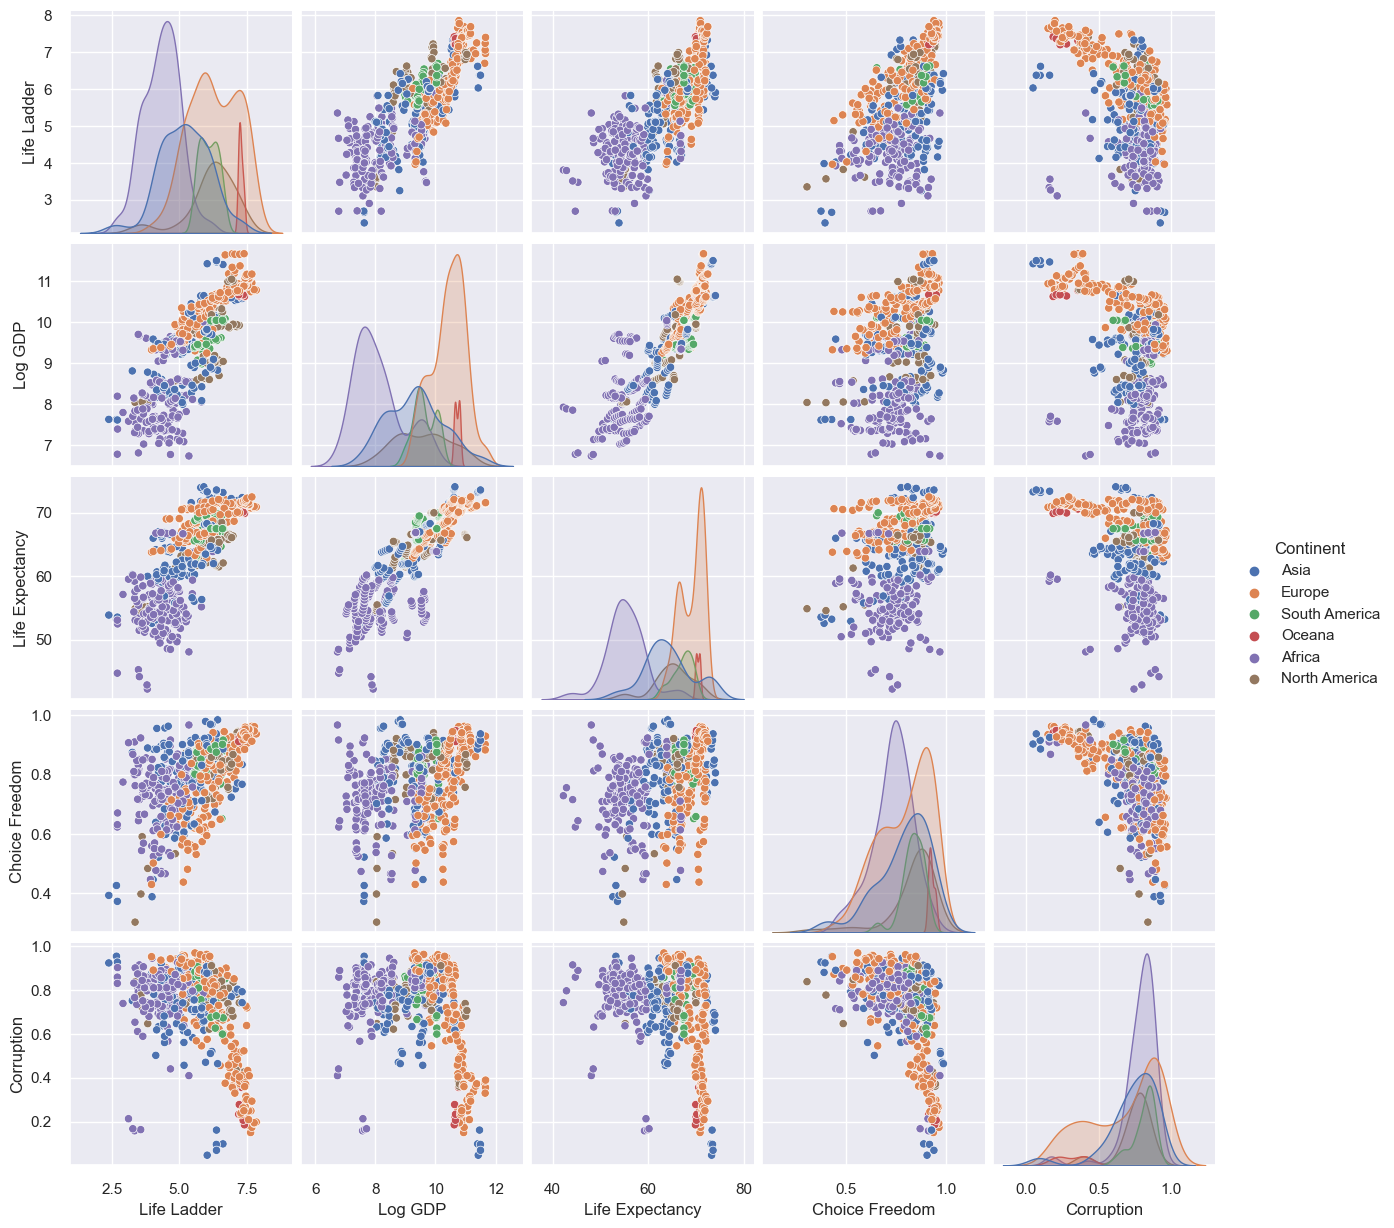

In [35]:
# TODO: Create seaborn pairplots with color based on the instructions above
cols = ['Life Ladder', 'Log GDP', 'Life Expectancy', 'Choice Freedom', 'Corruption', 'Continent'] 
sns.pairplot(merged[cols], hue='Continent')

<div class="alert alert-block alert-success"><b>Problem 10 (1 pt.)</b>:
    
In a Markdown cell, explain how the color in the Seaborn pairplot shows adds to the depth of the analysis. Use specific details from your plot in your answer by citing examples with your data.
    
</div>

Life Ladder appears to be positively associated with Log GDP, Life Expectancy, and Choice Freedom. European countries tend to score high in these areas, with the exception of Corruption where a negative correlation is observed, indicating lower levels of corruption associated with better outcomes in the other metrics. Conversely, countries in Africa exhibit lower performance on these indicators, suggesting challenges in economic prosperity, life span, and freedom of choice. Corruption seems to be more prevelant in the African countires.

### Write out your final data

Module 5 and Module 6 homework code can be used as examples for your own EDA phase 1 and phase 2 homework.  After each phase you should be writing out your data so that it can be read into the next phase. After EDA 2, you will be writing an Executive Summary in Jupyter Notebook where you should do no data cleaning, but simply read in your final file and provide your analysis.

In [36]:
merged.to_csv('Happiness_final.csv', header = True, index = False)

### This section below is not part of the homework this week, but is extra sample code for your reference.  
    
The code shows the following:

1. Plotting by year on x-axis to show change over time
2. Ranking of data and using the ranks to group the data into bins
    


### Plotting over time

We will take the 10 largest countries in regard to `Population` in 2015. Notice that we are using `index` and `.loc` to get all columns of data and storing this into a new dataframe called `largest`.

In [37]:
index = year2015['Population'].nlargest(10).index
index
largest = merged.loc[index]
largest 

Int64Index([231, 542, 236, 71, 409, 394, 35, 262, 337, 428], dtype='int64')

Country  Year  Life Ladder    Log GDP  Social support  \
231          India  2015     4.342079   8.606009        0.610133   
542  United States  2015     6.863947  10.977470        0.903571   
236      Indonesia  2015     5.042800   9.225190        0.809478   
71          Brazil  2015     6.546897   9.620074        0.906693   
409       Pakistan  2015     4.823195   8.361321        0.561720   
394        Nigeria  2015     4.932915   8.615186        0.811648   
35      Bangladesh  2015     4.633474   8.216118        0.601468   
262          Japan  2015     5.879684  10.606649        0.922657   
337         Mexico  2015     6.236287   9.866248        0.760614   
428    Philippines  2015     5.547489   8.895648        0.853589   

     Life Expectancy  Choice Freedom  Generosity  Corruption  Positive affect  \
231        59.099998        0.777225   -0.005791    0.776435         0.657201   
542        66.599998        0.848753    0.216716    0.697543         0.768671   
236        62.299999        0.779418    0.470236    0.945967         0.796219   
71         64.699997        0.798935   -0.017049    0.771339         0.687064   
409        55.799999        0.586546    0.085119    0.716641         0.469452   
394        53.099998        0.680470   -0.035880    0.926109         0.714879   
35         63.799999        0.814796   -0.068596    0.720601         0.543084   
262        73.599998        0.831694   -0.158819    0.654443         0.702269   
337        65.800003        0.719466   -0.153377    0.707972         0.706145   
428        61.900002        0.911534   -0.051945    0.755192         0.796322   

     Negative affect  Government confidence  Population Country_code  \
231         0.321829               0.694717  1310152392           IN   
542         0.274688               0.346936   320738994           US   
236         0.274292               0.645185   258383257           ID   
71          0.324699               0.198535   204471759           BR   
409         0.328647               0.459588   199426953           PK   
394         0.251190               0.410358   181137454           NG   
35          0.225754               0.760612   156256287           BD   
262         0.176409               0.352867   127141000           JP   
337         0.237188               0.256193   121858251           MX   
428         0.350588               0.668414   102113206           PH   

    Continent_code      Continent  
231             AS           Asia  
542             NA  North America  
236             AS           Asia  
71              SA  South America  
409             AS           Asia  
394             AF         Africa  
35              AS           Asia  
262             AS           Asia  
337             NA  North America  
428             AS           Asia

Since we plan to plot for all the years in the data, we need to get all the data for our top ten countries from the `merged` dataframe. 

In [38]:
comparelist = list(largest['Country'])
comparelist
compare = merged[merged['Country'].isin(comparelist)]

['India',
 'United States',
 'Indonesia',
 'Brazil',
 'Pakistan',
 'Nigeria',
 'Bangladesh',
 'Japan',
 'Mexico',
 'Philippines']

This plot shows the choice of freedom happiness category for our ten countries from 2015 to 2019.

In [39]:
fig = px.line(compare, x = "Year", y = "Choice Freedom", color='Country', 
        title='Freedom of Choice ', color_discrete_sequence = px.colors.qualitative.Bold)

fig.update_layout(height = 600, xaxis_title = 'Year')

### Ranking of data

There will be times when you will want to look at sections of your data to see if there are differences between groupings. One way to do this is with ranking of data and the creating groups. This is different from clustering because you are chosing the ranking variable and the cut offs for the groups.

 __[Data Frame Rank](https://pandas.pydata.org/pandas-docs/version/0.18/generated/pandas.DataFrame.rank.html)__

In [40]:
# create a copy of 2015 data
year2015copy = year2015.copy()

When you look at five sample rows of data after the ranking, you can see a new column called `popRank` that has given the most populous country in 2015 a value of 1 and the least populous a value of 113.

In [41]:
year2015copy = year2015copy.reset_index()
year2015copy['popRank'] = year2015copy['Population'].rank(ascending = False)
year2015copy.sample(5)

index        Country  Year  Life Ladder    Log GDP  Social support  \
51     250         Israel  2015     7.079411  10.526913        0.864130   
25     123        Croatia  2015     5.205438  10.122007        0.768363   
23     111       Colombia  2015     6.387572   9.553629        0.889900   
108    542  United States  2015     6.863947  10.977470        0.903571   
81     409       Pakistan  2015     4.823195   8.361321        0.561720   

     Life Expectancy  Choice Freedom  Generosity  Corruption  Positive affect  \
51         71.800003        0.752784    0.106784    0.789430         0.651632   
25         67.900002        0.693523   -0.099673    0.848546         0.570057   
23         68.300003        0.790898   -0.100814    0.842899         0.803392   
108        66.599998        0.848753    0.216716    0.697543         0.768671   
81         55.799999        0.586546    0.085119    0.716641         0.469452   

     Negative affect  Government confidence  Population  popRank  
51          0.256258               0.405343     8380100     73.0  
25          0.294019               0.364868     4203604     91.0  
23          0.291769               0.271787    47520667     21.0  
108         0.274688               0.346936   320738994      2.0  
81          0.328647               0.459588   199426953      5.0

When creating categories, the number of categories and the breakdown of each category will depend on the data.  For example purposes, this data will be broken into three categories with the splits based on the `popRank` column.

In [42]:
from pandas import Categorical 
# create categorical variable for rankings - divide in thirds
top_cat = 37 # gives us top third of rankings based on 113 countries
low_cat = 75 # gives us bottom third of rankings

# assign a category of 1, 2, or 3 based on how ranked with teeth value
year2015copy['popCat'] = Categorical(np.where(year2015copy['popRank'] <= top_cat,1,2))
year2015copy['popCat'] = Categorical(np.where(year2015copy['popRank'] >= low_cat,3,year2015copy['popCat']))
year2015copy['popCat'].value_counts()

3    39
1    37
2    37
Name: popCat, dtype: int64

In [43]:
temp = year2015copy[['Country','Population','popRank']]
temp.sort_values(by = ['popRank'])

Country  Population  popRank
47           India  1310152392      1.0
108  United States   320738994      2.0
48       Indonesia   258383257      3.0
15          Brazil   204471759      4.0
81        Pakistan   199426953      5.0
..             ...         ...      ...
11          Bhutan      727885    109.0
70      Montenegro      622159    110.0
60      Luxembourg      569604    111.0
65           Malta      445053    112.0
46         Iceland      330815    113.0

[113 rows x 3 columns]

### Results of Rankings and Categorization
Using `groupby` we can see the mean values for each category.

Keep in mind that Group 1 is the most populous and Group 3 is the least populous.
1. Interesting that almost all of the categories are better for group 3 - or the least populous. 
2. And then Group 1, the most populous, has the next best set of scores.
3. The worst group in almost every category is group 2!


In [44]:
# how do our groupings differ?
year2015copy.groupby('popCat').mean(numeric_only = True)

index  Life Ladder   Log GDP  Social support  Life Expectancy  \
popCat                                                                       
1       307.027027     5.410703  9.241387        0.807442        63.035135   
2       263.189189     5.333634  9.096096        0.778766        61.875676   
3       270.615385     5.612790  9.797522        0.823479        65.533333   

        Choice Freedom  Generosity  Corruption  Positive affect  \
popCat                                                            
1             0.768396    0.080246    0.752726         0.679936   
2             0.757791   -0.010320    0.735873         0.677207   
3             0.753242    0.009153    0.707278         0.654233   

        Negative affect  Government confidence    Population  popRank  
popCat                                                                 
1              0.271805               0.488665  1.140240e+08     19.0  
2              0.270880               0.528884  1.345873e+07     56.0  
3              0.276783               0.433603  3.788129e+06     94.0

Even though there appear to be difference between the three categories when looking at the means, the plots below do not show any patterns.

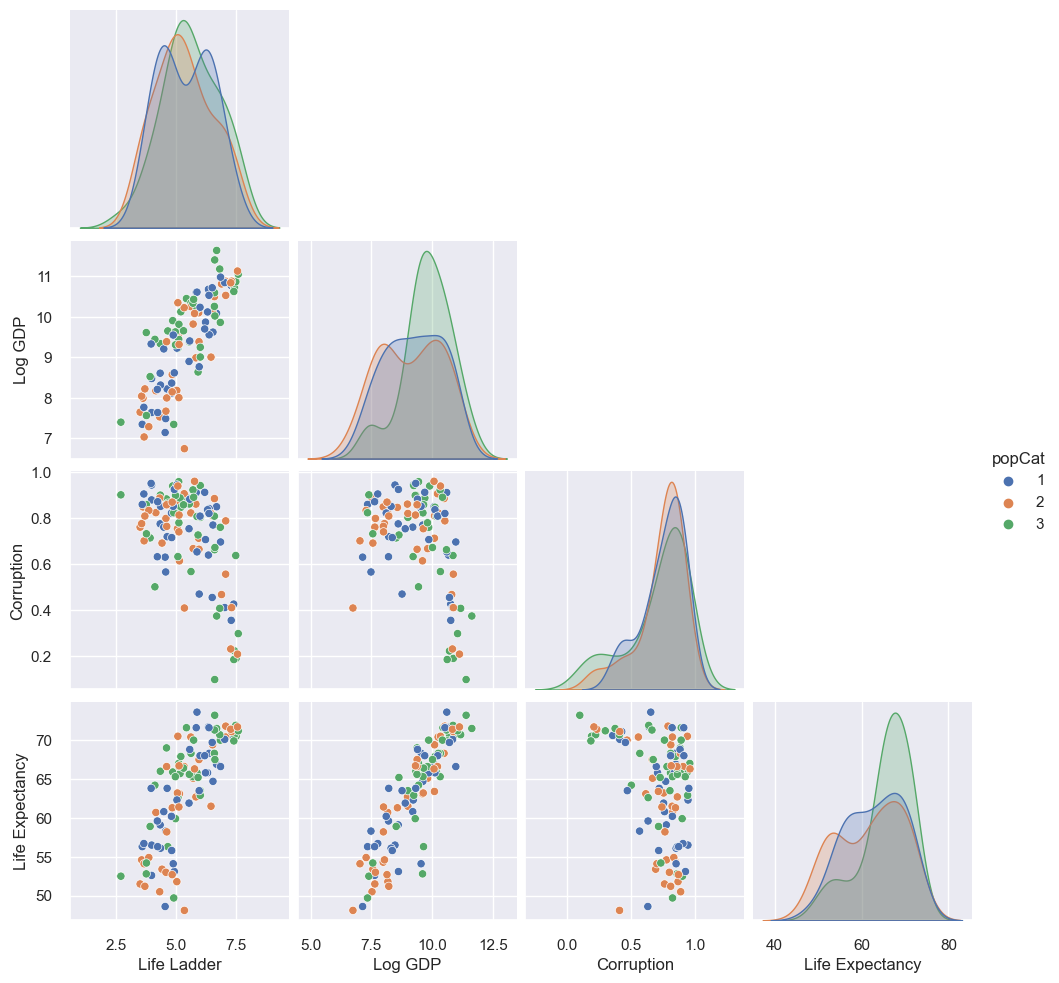

In [45]:
# pairplots on three fields
#columns = year2015copy.columns[1:5]
#columns
sns.pairplot(year2015copy, hue = 'popCat', kind = 'scatter',  corner = True, 
             vars = ['Life Ladder', 'Log GDP', 'Corruption', 'Life Expectancy'])
